# Regresión lineal 

busca ajustar una curva construida de variables independientes (teóricamente de distribuciones normales, y lineal bivariadamente con el target).

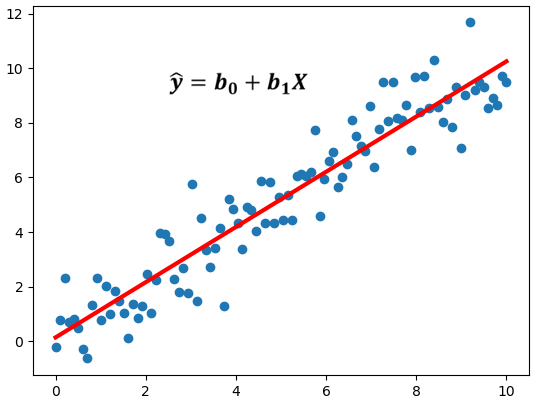

https://www.ibm.com/docs/es/spss-statistics/version-missing?topic=features-linear-regression

## Implementación 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Cargamos dataset 

A modo de ejemplo usaremo el dataset de precios de departamento de boston que se encuentra en sklearn

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [2]:
base = load_boston()
base_x=pd.DataFrame(base.data, columns= base.feature_names)
base_y=pd.DataFrame(base.target, columns=['MEDV'])

In [3]:
print(base_x.shape)
base_x.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
base_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


En la documentación, podemos saber que significa cada variable

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

LSTAT: % lower status of the population

MEDV(target): Median value of owner-occupied homes in $1000’s

In [5]:
base_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Revisando la base, notamos que las variables tienes distintas escalas

**Histogramas de las variables**

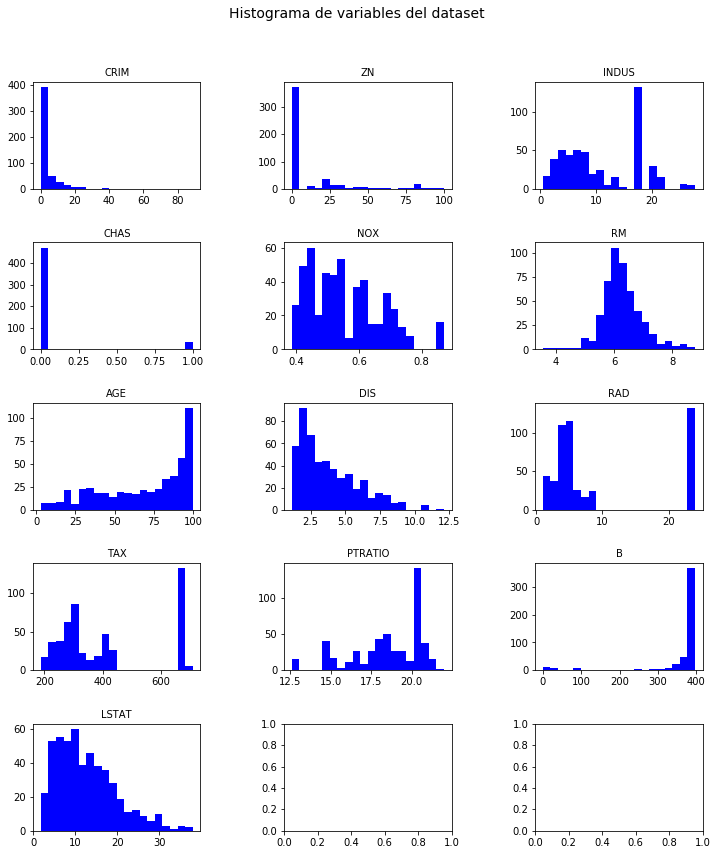

In [6]:
fig, axs = plt.subplots(5, 3,figsize=(12,13))
plt.suptitle('Histograma de variables del dataset', fontsize=14)
var=base_x.columns.to_list() 
axs = axs.ravel()

for k,i in zip(var,range(0,len(var))):
    axs[i].hist(base_x[k],color='blue', bins=20)
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

**revisando target**

In [7]:
base_y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [8]:
base_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [9]:
base_y=base_y.astype(np.int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013647F177C8>]],
      dtype=object)

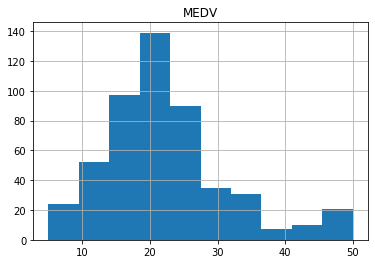

In [10]:
base_y.hist()

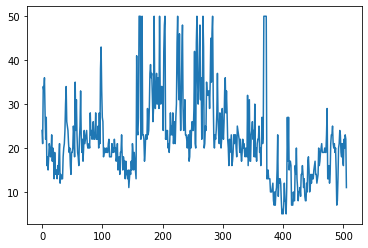

In [11]:
plt.plot(base_y)

**Análisis bivariado**

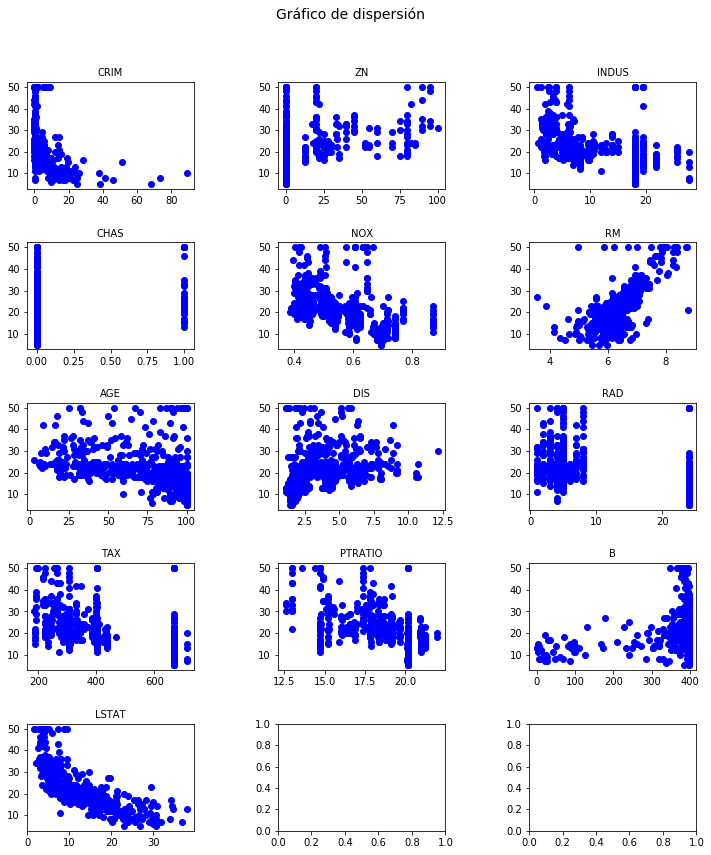

In [12]:
fig, axs = plt.subplots(5, 3,figsize=(12,13))
plt.suptitle('Gráfico de dispersión', fontsize=14)
var=base_x.columns.to_list() 
axs = axs.ravel()

for k,i in zip(var,range(0,len(var))):
    axs[i].scatter(base_x[k],base_y,color='blue')
    axs[i].set_title(k,fontsize=10)
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)    

## Probemos una regresión con una variable independiente

Se elije una variable que tiene cierta tendencia explicativa con el target.

https://www.youtube.com/watch?v=A8_lmeCAzfU

**Forma general de una regresión**

<font size="5"> $ y = b_{0} + b_{1}*x$ </font>

**Calculo de los parámetros**

<font size="5"> $b_{1} = \frac{cov(x,y)}{var(x)}$ </font>

<font size="5"> $b_{0} = \bar y - b_{1}*\bar x$ </font>

RM: número medio de habitaciones por vivienda

In [13]:
base_rm=base_x[['RM']]
X_train_rm, X_test_0_rm, y_train_rm, y_test_0_rm = train_test_split(base_rm, base_y, test_size=0.3, random_state=20)

<font size="5"> $cov(x,y) = \sum \frac{(x_{i} - \bar x)(y_{i} - \bar y)}{n}$ </font>

In [14]:
X_train_rm_cov=X_train_rm.copy()
y_train_rm_cov=y_train_rm.copy()
### calculo de la covarianza
X_train_rm_cov['sx']=X_train_rm_cov- X_train_rm_cov.mean()
y_train_rm_cov['sy']=y_train_rm_cov - y_train_rm_cov.mean()
X_train_rm_cov=pd.concat([X_train_rm_cov,y_train_rm_cov],axis=1)
X_train_rm_cov['sxsy']=X_train_rm_cov.sx*X_train_rm_cov.sy
### parametros
b1=(X_train_rm_cov.sxsy.sum()/len(X_train_rm_cov))/np.var(X_train_rm)
y_mean=y_train_rm.mean()
x_mean=X_train_rm.mean()
b0=y_mean[0]-b1*x_mean[0]
print("b0: ",b0)
print("b1: ",b1)

b0:  RM   -36.607749
dtype: float64
b1:  RM    9.384455
dtype: float64


**La recta queda definida, así:**

<font size="5"> $y = -36.607749 + 9.384455*x$ </font>

Ahora, construyamos la recta usando la libreía de sklearn

In [15]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train_rm,y_train_rm)

LinearRegression()

In [16]:
print("beta:",modelo_1.coef_)
print("alpha:",modelo_1.intercept_)
print("y = alpha + beta*x")

beta: [[9.3844553]]
alpha: [-36.60774924]
y = alpha + beta*x


In [17]:
predic_modelo_1 = modelo_1.predict(X_test_0_rm)

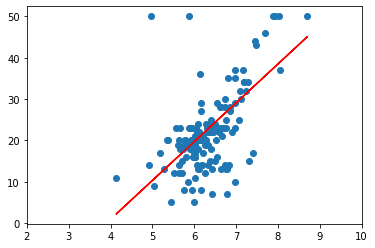

In [18]:
plt.scatter(X_test_0_rm,y_test_0_rm)
plt.plot(X_test_0_rm,predic_modelo_1, color='red')
plt.xlim(2,10)
plt.show()

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

In [19]:
print("Mean squared error: " ,mean_squared_error(y_test_0_rm, predic_modelo_1))
print('r2 score:', r2_score(y_test_0_rm, predic_modelo_1))

Mean squared error:  58.664037968990264
r2 score: 0.32211203960196644


Vemos que es una regresión con un error medio cuadrado muy alto, para reducirlo podemos construir la regresión incluyendo más variables

## Regresión multivariable 

Se construirá una regresión de manera didáctica sin buscar la recta óptima.

**Correlación entre las variables**

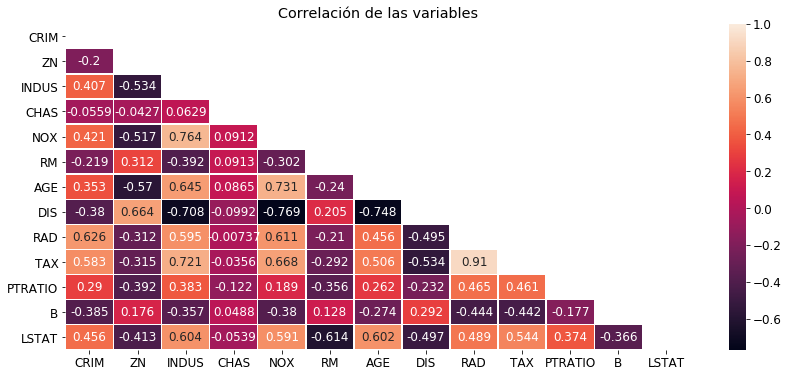

In [20]:
plt.rcParams['figure.figsize']=14,6
plt.rcParams['font.size'] = 12

with sns.axes_style("white"):
    temp=base_x.corr()
    
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    
sns.heatmap(temp,mask=mask,annot=True,fmt='.3g', linewidths=.4)
plt.title("Correlación de las variables")
plt.show()

In [21]:
base_x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Variables que no tengan mediana y alta correlación, a jucio experto.

In [21]:
var=['CRIM', 'CHAS', 'RM', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
base_x_corr=base_x[var].copy()

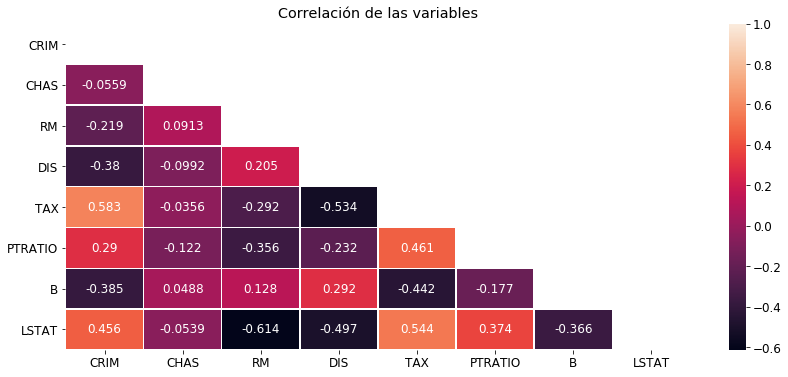

In [22]:
plt.rcParams['figure.figsize']=14,6
plt.rcParams['font.size'] = 12

with sns.axes_style("white"):
    temp=base_x_corr.corr()
    
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    
sns.heatmap(temp,mask=mask,annot=True,fmt='.3g', linewidths=.4)
plt.title("Correlación de las variables")
plt.show()


Primero, estandaricemos las variables

**Usaremos la estandarización de min y max**

Se puede usar cualquier otra, depende del modelador.

<font size="5"> $x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$ </font>

In [23]:
base_x=base_x.apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [24]:
base_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


**Separamos el dataset en base de entrenamiento y prueba**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(base_x, base_y, test_size=0.3, random_state=21)

## Modelo con todas las variables 

Usaremos statsmodel para ver si alguna variable tiene p-valor alto.

**Modelo con stastmodel**

In [28]:
x_train_stast=sm.add_constant(X_train)
X_test_stat=sm.add_constant(X_test)

In [29]:
# Ordinary least squares
modelo_2_0= sm.OLS(y_train,x_train_stast).fit()

In [30]:
print(modelo_2_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     78.56
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           5.62e-94
Time:                        22:33:12   Log-Likelihood:                -1033.5
No. Observations:                 354   AIC:                             2095.
Df Residuals:                     340   BIC:                             2149.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3328      2.718     10.056      0.0

Notamos algunas variables con **p-valor>0.05**

Se podría excluir esas variables, queda como ejercicio revisar resultado excluyendo esas variables.

In [31]:
predic_modelo_2_0= modelo_2_0.predict(X_test_stat)

In [32]:
print("Mean squared error: " ,mean_squared_error(y_test, predic_modelo_2_0))
print('r2 score:', r2_score(y_test, predic_modelo_2_0))

Mean squared error:  28.148019645538653
r2 score: 0.7076871214724489


**Modelo con skelearn**

In [33]:
modelo_2 = LinearRegression()
modelo_2.fit(X_train,y_train)
predic_modelo_2= modelo_2.predict(X_test)

In [33]:
print("Mean squared error: " ,mean_squared_error(y_test, predic_modelo_2))
print('r2 score:', r2_score(y_test, predic_modelo_2))

Mean squared error:  28.148019645538668
r2 score: 0.7076871214724487


In [34]:
modelo_2.coef_

array([[ -8.68614392,   5.49823152,   0.59269991,   2.09319516,
         -8.9875141 ,  16.72171971,   0.41971775, -15.60828043,
          8.14403677,  -7.34013435, -10.08791587,   4.67656706,
        -19.20243619]])

In [35]:
modelo_2.intercept_

array([27.33282039])

### Reducción de variables 

Con lo visto, podemos usar el análisis de correlación y el modelo con stastmodelo para disminuir la complejidad del modelo sin perder poder de predicción.

A modo de ejemplo, quitaremos algunas variables altamente correlacionadas **(corr>0.8)** y que tengan **p-valor>0.05**

In [34]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
var=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
base_x_corr=base_x[var].copy()
X_train_1=X_train[var]
X_test_1=X_test[var]

In [36]:
modelo_2_1 = LinearRegression()
modelo_2_1.fit(X_train_1,y_train)
predic_modelo_2_1= modelo_2_1.predict(X_test_1)

Veamos el ajuste del modelo

In [37]:
print("Mean squared error: " ,mean_squared_error(y_test, predic_modelo_2_1))
print('r2 score:', r2_score(y_test, predic_modelo_2_1))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test, predic_modelo_2_1)))

Mean squared error:  28.709665314364106
r2 score: 0.7018545171104251
RMSE:  5.358140098426328


Se redujo las variables pero el error aumentó un poco, ¿Vale la pena?

**Ejercicio**

Construir modelo que disminuya el error, se puede probar cambiando el punto de correlación para excluir algunas variables, cambiando el método de estandarización, construir nuevas variables basadas en las actuales.

### Regresión usando RFE 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Recursive feature elimination: Busca reducir la cantidad de variables mediante la eliminación de variables con menos importancia, se detiene cuando se alcanza las variables que se asignaron a obtener

In [38]:
estimador = SVR(kernel="linear")

Por si quieren mayor detalle acerca del SVR: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [39]:
modelo_3 = RFE(estimador, n_features_to_select=10, step=1)

In [40]:
modelo_3 = modelo_3.fit(X_train, y_train.values.ravel())

In [41]:
modelo_3.support_

array([ True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [42]:
modelo_3.ranking_

array([1, 1, 4, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [43]:
var_2=['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
base_x_rfe=base_x[var_2].copy()
X_train_2=X_train[var_2]
X_test_2=X_test[var_2]

In [44]:
modelo_3_1= LinearRegression()
modelo_3_1.fit(X_train_2,y_train)
predic_modelo_3_1=modelo_3_1.predict(X_test_2)

In [45]:
print("Mean squared error: " ,mean_squared_error(y_test, predic_modelo_3_1))
print('r2 score:', r2_score(y_test, predic_modelo_3_1))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test, predic_modelo_3_1)))

Mean squared error:  28.937926517807288
r2 score: 0.6994840594272604
RMSE:  5.379398341618446


¿Si solo quisiera 8 variables input?

In [46]:
modelo_4 = RFE(estimador, n_features_to_select=8, step=1)
modelo_4 = modelo_4.fit(X_train, y_train.values.ravel())

In [47]:
modelo_4.ranking_

array([3, 1, 6, 5, 1, 1, 4, 1, 2, 1, 1, 1, 1])

In [48]:
base_x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [49]:
var_3=['ZN', 'NOX', 'RM', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']
base_x_rfe2=base_x[var_3].copy()
X_train_3=X_train[var_3]
X_test_3=X_test[var_3]

In [50]:
modelo_4_1= LinearRegression()
modelo_4_1.fit(X_train_3,y_train)
predic_modelo_4_1=modelo_4_1.predict(X_test_3)

In [51]:
print("Mean squared error: " ,mean_squared_error(y_test, predic_modelo_4_1))
print('r2 score:', r2_score(y_test, predic_modelo_4_1))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test, predic_modelo_4_1)))

Mean squared error:  29.923637508670613
r2 score: 0.6892476015604573
RMSE:  5.470250223588553


¿Cual será el número óptimo de variables para obtner un menor RMSE?

Consolidemos los resultados

In [52]:
MSE_m1=mean_squared_error(y_test_0_rm, predic_modelo_1)
RMSE_m1=np.sqrt(mean_squared_error(y_test_0_rm, predic_modelo_1))
R2_score_m1=r2_score(y_test_0_rm, predic_modelo_1)
###
MSE_m2_0=mean_squared_error(y_test, predic_modelo_2_0)
RMSE_m2_0=np.sqrt(mean_squared_error(y_test, predic_modelo_2_0))
R2_score_m2_0=r2_score(y_test, predic_modelo_2_0)
###
MSE_m2=mean_squared_error(y_test, predic_modelo_2)
RMSE_m2=np.sqrt(mean_squared_error(y_test, predic_modelo_2))
R2_score_m2=r2_score(y_test, predic_modelo_2)
###
MSE_m2_1=mean_squared_error(y_test, predic_modelo_2_1)
RMSE_m2_1=np.sqrt(mean_squared_error(y_test, predic_modelo_2_1))
R2_score_m2_1=r2_score(y_test, predic_modelo_2_1)
###
MSE_m3_1=mean_squared_error(y_test, predic_modelo_3_1)
RMSE_m3_1=np.sqrt(mean_squared_error(y_test, predic_modelo_3_1))
R2_score_m3_1=r2_score(y_test, predic_modelo_3_1)
###
MSE_m4_1=mean_squared_error(y_test, predic_modelo_4_1)
RMSE_m4_1=np.sqrt(mean_squared_error(y_test, predic_modelo_4_1))
R2_score_m4_1=r2_score(y_test, predic_modelo_4_1)

In [53]:
Tabla=pd.DataFrame({"Modelo":["Modelo 1","Modelo 2","Modelo 3","Modelo 4","Modelo 5","Modelo 6"],
                    "Tipo":["sklearn","statsmodel","sklearn","sklearn","sklearn - RFE","sklearn - RFE"],
                    "# Variable":[1,13,13,10,10,8],"MSE":[MSE_m1,MSE_m2_0,MSE_m2,MSE_m2_1,MSE_m3_1,MSE_m4_1],
                    "RMSE":[RMSE_m1,RMSE_m2_0,RMSE_m2,RMSE_m2_1,RMSE_m3_1,RMSE_m4_1],
                    "R2 Score":[R2_score_m1,R2_score_m2_0,R2_score_m2,R2_score_m2_1,R2_score_m3_1,R2_score_m4_1]})
Tabla

,Modelo,Tipo,# Variable,MSE,RMSE,R2 Score
0,Modelo 1,sklearn,1,58.664038,7.659245,0.322112
1,Modelo 2,statsmodel,13,28.148020,5.305471,0.707687
2,Modelo 3,sklearn,13,28.148020,5.305471,0.707687
3,Modelo 4,sklearn,10,28.709665,5.358140,0.701855
4,Modelo 5,sklearn - RFE,10,28.937927,5.379398,0.699484
5,Modelo 6,sklearn - RFE,8,29.923638,5.470250,0.689248


¿pueden armar un código que te disminuya la cantidad de variables tal que el error sea menor?

Si creamos nuevas variables a partir de las dadas, ¿se podra mejorar el desempeño del modelo?

### Modelos lineales con regularización 

https://scikit-learn.org/stable/modules/linear_model.html